In [24]:
import pandas as pd
import numpy as np
import scipy, scipy.stats

import statsmodels.formula.api as sm
from statsmodels.tools.tools import add_constant
from IPython.core.display import HTML

from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline
# from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
# from mpl_toolkits.mplot3d import Axes3D

#from basis_expansions.basis_expansions import Polynomial, LinearSpline

# from regression_tools.dftransformers import (
#     ColumnSelector, Identity, FeatureUnion, MapFeature, Intercept)

# from regression_tools.plotting_tools import (
#     plot_univariate_smooth, bootstrap_train, display_coef, 
#     plot_bootstrap_coefs, plot_partial_depenence, 
#     plot_partial_dependences, predicteds_vs_actuals)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [7]:
def round_to_3(x):
    return round(x,3)

In [4]:
cdf = pd.read_csv('ddf_final_without_scores.csv')
numeric_predictors = ['elo', 'opp_elo', 'diff', 'color',
                      'game_time', 'start_time', 'weekday', 'day']
X = np.array(cdf[numeric_predictors])
y = cdf['result']

In [8]:
X = add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     38.04
Date:                Thu, 23 Aug 2018   Prob (F-statistic):           5.30e-50
Time:                        10:31:16   Log-Likelihood:                -1133.4
No. Observations:                1809   AIC:                             2283.
Df Residuals:                    1801   BIC:                             2327.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8078      0.148      5.460      0.000       0.518       1.098
x1             0.0003      0.000      2.938      0.003       0.000       0.001
x2            -0.0007    6.5e-05    -10.843      0.000      -0.001      -0.001
x3             0.0010   9.34e-05     11.090      0.000       0.001       0.001
x4             0.0671      0.021      3.140      0.002       0.025       0.109
x5          7.399e-05   7.45e-05      0.993      0.321   -7.21e-05       0.000
x6         -2.939e-06   2.21e-06     -1.328      0.184   -7.28e-06     1.4e-06
x7            -0.0002      0.005     -0.046      0.963      -0.011       0.010
x8         -5.847e-05      0.001     -0.046      0.963      -0.003       0.002
==============================================================================
Omnibus:                        0.053   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.974   Jarque-Bera (JB):              206.183
Skew:                          -0.013   Prob(JB):                     1.69e-45
Kurtosis:                       1.346   Cond. No.                     5.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [116]:
cdf = cdf[cdf['result'] != 0.5]
df = cdf[['elo', 'opp_elo', 'diff', 'color',
          'game_time', 'start_time', 'weekday',
          'day', 'result']].copy()
X = df.copy()
y = X.pop('result')

In [117]:
mod = sm.ols(
    formula='result ~ elo * opp_elo * diff * color + game_time * start_time + weekday * day -1'
    , data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     127.4
Date:                Thu, 23 Aug 2018   Prob (F-statistic):          1.14e-308
Time:                        13:02:41   Log-Likelihood:                -1055.0
No. Observations:                1703   AIC:                             2148.
Df Residuals:                    1684   BIC:                             2251.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
elo                        0

In [118]:
res.rsquared

0.5897417500648034

In [119]:
res.pvalues

elo                       0.160754
opp_elo                   0.413399
elo:opp_elo               0.003154
diff                      0.265948
elo:diff                  0.612921
opp_elo:diff              0.491175
elo:opp_elo:diff          0.738950
color                     0.264598
elo:color                 0.902458
opp_elo:color             0.081074
elo:opp_elo:color         0.255382
diff:color                0.309866
elo:diff:color            0.192076
opp_elo:diff:color        0.289168
elo:opp_elo:diff:color    0.194493
game_time                 0.133719
start_time                0.754957
game_time:start_time      0.359981
weekday                   0.883736
day                       0.886046
weekday:day               0.695254
dtype: float64

In [120]:
res.bse

elo                       2.213984e-03
opp_elo                   2.253523e-03
elo:opp_elo               3.392829e-07
diff                      4.448659e-03
elo:diff                  7.725798e-06
opp_elo:diff              6.092649e-06
elo:opp_elo:diff          7.021059e-09
color                     2.253917e+00
elo:color                 5.050843e-03
opp_elo:color             3.854535e-03
elo:opp_elo:color         3.143596e-06
diff:color                7.232989e-03
elo:diff:color            1.266384e-05
opp_elo:diff:color        8.889616e-06
elo:opp_elo:diff:color    1.027875e-08
game_time                 2.546212e-04
start_time                8.936654e-06
game_time:start_time      1.634535e-08
weekday                   1.167506e-02
day                       2.274896e-03
weekday:day               6.497482e-04
dtype: float64

In [121]:
res.predict()

array([-0.24949245,  1.08542183, -0.11175111, ...,  0.33191003,
        0.51061958,  0.41307099])

In [122]:
print(res.params)

elo                       3.106567e-03
opp_elo                  -1.843673e-03
elo:opp_elo              -1.003109e-06
diff                      4.950520e-03
elo:diff                 -3.909275e-06
opp_elo:diff             -4.195350e-06
elo:opp_elo:diff          2.340114e-09
color                    -2.515286e+00
elo:color                -6.191091e-04
opp_elo:color             6.728227e-03
elo:opp_elo:color        -3.576661e-06
diff:color               -7.347336e-03
elo:diff:color            1.652613e-05
opp_elo:diff:color        9.425502e-06
elo:opp_elo:diff:color   -1.334099e-08
game_time                 3.820131e-04
start_time                2.789667e-06
game_time:start_time     -1.496664e-08
weekday                   1.707565e-03
day                       3.260622e-04
weekday:day              -2.545723e-04
dtype: float64


In [123]:
final = sm.OLS(y, X).fit()

print(final.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     299.7
Date:                Thu, 23 Aug 2018   Prob (F-statistic):          4.18e-291
Time:                        13:02:52   Log-Likelihood:                -1128.0
No. Observations:                1703   AIC:                             2270.
Df Residuals:                    1696   BIC:                             2308.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
elo            0.0009   6.27e-05     13.907      0.0

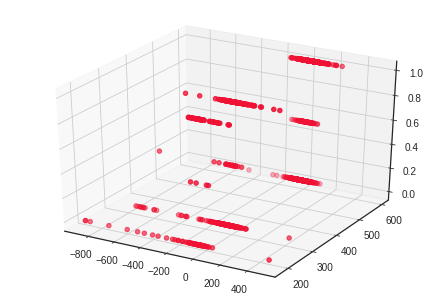

In [58]:
elo = cdf['elo'].values
opp_elo = cdf['opp_elo'].values
diff = cdf['diff'].values
color_ = cdf['color'].values
start_time = cdf['start_time'].values
game_time = cdf['game_time'].values
weekday = cdf['weekday'].values
day = cdf['day'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(diff, game_time, y, color='#ef1234')
plt.show()

In [ ]:
# weekday_fit = Pipeline([('weekday', ColumnSelector(name='weekday')), (
#     'weekday_spline', LinearSpline(knots=[0, 1, 2, 3, 4, 5, 6]))])
# game_time_fit = Pipeline([('game_time', ColumnSelector(name='game_time')), (
#     'game_time_spline', LinearSpline(knots=[150, 300, 450, 600]))])
# color_fit = Pipeline([('color', ColumnSelector(name='color')), (
#     'color_spline', LinearSpline(knots=[1]))])
# elo_fit = Pipeline([('elo', ColumnSelector(name='elo')), (
#     'elo_spline', LinearSpline(knots=[600, 700, 800, 900, 1000]))])
# diff_fit = Pipeline([('diff', ColumnSelector(name='diff')), (
#     'diff_spline', LinearSpline(knots=[-500, -100, -50, -20, -10, -5, 0, 0, 5, 10, 20, 50, 100, 500]))])
# opp_elo_fit = Pipeline([('opp_elo', ColumnSelector(name='opp_elo')), (
#     'opp_elo_spline', LinearSpline(knots=[600, 700, 800, 900, 1000, 1100, 1300, 1800]))])
# day_fit = Pipeline([('day', ColumnSelector(name='day')), (
#     'day_spline', LinearSpline(knots=[5, 10, 15, 20, 25, 30]))])
# start_time_fit = Pipeline([('start_time', ColumnSelector(name='start_time')), (
#     'start_time_spline', LinearSpline(knots=[0, 8000, 12000, 16000, 18000, 20000, 23999]))])

In [ ]:
# result_pipeline = FeatureUnion([
#     ('intercept', Intercept()), ('diff_fit', diff_fit),
#     ('elo_fit', elo_fit), ('opp_elo_fit', opp_elo_fit),
#     ('color_fit', color_fit), ('game_time_fit', game_time_fit),
#     ('start_time_fit', start_time_fit), ('weekday_fit', weekday_fit),
#     ('day_fit', day_fit)])
# result_pipeline.fit(X)
# result_features = result_pipeline.transform(X)
# result_model = LinearRegression(fit_intercept=False)
# result_model.fit(result_features.values, y.values)

In [ ]:
# bootstrap_models = bootstrap_train(
#     LinearRegression, result_features.values,
#     y.values, fit_intercept=False, bootstraps=10000)

In [ ]:
# diff_spec = ColumnSelector(name="diff")
# color_spec = ColumnSelector(name="color")
# game_spec = ColumnSelector(name="game_time")
# st_spec = ColumnSelector(name="start_time")
# wd_spec = ColumnSelector(name="weekday")


# balanced_pipeline = FeatureUnion([
#     ('intercept', Intercept()), ('diff_fit', diff_spec),
#     ('color_fit', color_spec), ('game_time_fit', game_spec),
#     ('start_time_fit', st_spec), ('weekday_fit', wd_spec)])
# balanced_pipeline = FeatureUnion([
#     ('intercept', Intercept()), ('diff_fit', diff_spec),
#     ('color_fit', color_spec), ('start_time_fit', st_spec)])
# balanced_pipeline.fit(X)
# balanced_features = balanced_pipeline.transform(X)
# balanced_features.head()

In [ ]:
# balanced_model = LinearRegression(fit_intercept=False)
# balanced_model.fit(balanced_features, y)

In [ ]:
# balanced_bootstrap = bootstrap_train(
#     LinearRegression, balanced_features.values,
#     y.values, fit_intercept=False, bootstraps=10000)

In [ ]:
# y_hat = balanced_model.predict(balanced_features.values)

In [ ]:
# def rss(y, y_hat):
#     return np.sum((y - y_hat)**2)

In [ ]:
# print("RSS: {}".format(rss(y, y_hat)))

In [ ]:
# def rsq(y, y_hat):
#     ss_tot = rss(y, np.mean(y))
#     ss_res = rss(y, y_hat)
#     return 1 - (ss_res / ss_tot)

In [ ]:
# print("R^2: {}".format(rsq(y, y_hat)))

In [ ]:
# def bootstrap_rsq(X, y, pipeline, n_boot=10000):
#     rsqs = []
#     for _ in range(n_boot):
#         X_boot, y_boot = resample(X, y)
#         X_transform = pipeline.transform(X_boot)
#         model = LinearRegression(fit_intercept=False)
#         model.fit(X_transform.values, y_boot)
#         y_boot_hat = model.predict(X_transform.values)
#         rsqs.append(rsq(y_boot, y_boot_hat))
#     return rsqs

In [ ]:
# rsqs = bootstrap_rsq(X, y, balanced_pipeline)

In [ ]:
# def plot_many_residuals(var_names, y_hat, n_bins=50):
#     fig, axs = plt.subplots(len(var_names), figsize=(12, 3*len(var_names)))
#     for ax, name in zip(axs, var_names):
#         x = cdf[name]
#         residual_plot(ax, x, y, y_hat)
#         ax.set_xlabel(name)
#         ax.set_title("Model Residuals by {}".format(name))
#     return fig, axs

In [ ]:
# def residual_plot(ax, x, y, y_hat, n_bins=50):
#     residuals = y - y_hat
#     ax.axhline(0, color="black", linestyle="--")
#     ax.scatter(x, residuals, color="grey", alpha=0.5)
#     ax.set_ylabel("Residuals ($y - \hat y$)")

In [ ]:
# weekday_fit.transform(cdf)
# game_time_fit.transform(cdf)
# color_fit.transform(cdf)
# elo_fit.transform(cdf)
# diff_fit.transform(cdf)
# opp_elo_fit.transform(cdf)
# day_fit.transform(cdf)
# start_time_fit.transform(cdf)
# print('hello')

In [ ]:
# def plot_basis(axs, basis_expansion, t):
#     basis = basis_expansion.fit_transform(t)
#     for idx, ax in enumerate(axs.flatten()):
#         ax.plot(t, basis[:, idx])

In [ ]:
# def plot_one_univariate(ax, var_name, mask=None, bootstrap=100):
#     if mask is None:
#         plot_univariate_smooth(ax, cdf[var_name].values.reshape(-1, 1),
#                                cdf['result'], bootstrap=bootstrap)
#     else:
#         plot_univariate_smooth(ax, cdf[var_name].values.reshape(-1, 1),
#                                cdf['result'], mask=mask, bootstrap=bootstrap)

In [ ]:
# def plot_many_predicteds_vs_actuals(var_names, y_hat, n_bins=50):
#     fig, axs = plt.subplots(len(var_names), figsize=(12, 3*len(var_names)))
#     for ax, name in zip(axs, var_names):
#         x = cdf[name]
#         predicteds_vs_actuals(ax, x, cdf["result"], y_hat, n_bins=n_bins)
#         ax.set_title("{} Predicteds vs. Actuals".format(name))
#     return fig, axs

In [ ]:
# def residual_plot(ax, x, y, y_hat, n_bins=50):
#     residuals = y - y_hat
#     ax.axhline(0, color="black", linestyle="--")
#     ax.scatter(x, residuals, color="grey", alpha=0.5)
#     ax.set_ylabel("Residuals ($y - \hat y$)")
# fig, ax = plt.subplots(figsize=(12, 3))
# residual_plot(ax, y_hat, cdf["result"], y_hat)
# ax.set_title("Residuals by Predicted Values")
# ax.set_xlabel("$\hat y$")
# plt.show()